In [1]:
!pip install --upgrade langchain
!pip install langchain-community
!pip install langchain==0.2.17 langchain-community==0.2.19 langsmith==0.1.112
!pip install google-generativeai
!pip install vaderSentiment
!pip install gradio

  Using cached langchain-0.3.11-py3-none-any.whl.metadata (7.1 kB)
  Using cached langchain_core-0.3.24-py3-none-any.whl.metadata (6.3 kB)
  Using cached langchain_text_splitters-0.3.2-py3-none-any.whl.metadata (2.3 kB)
  Using cached langsmith-0.2.3-py3-none-any.whl.metadata (14 kB)
Using cached langchain-0.3.11-py3-none-any.whl (1.0 MB)
Using cached langchain_core-0.3.24-py3-none-any.whl (410 kB)
Using cached langchain_text_splitters-0.3.2-py3-none-any.whl (25 kB)
Using cached langsmith-0.2.3-py3-none-any.whl (320 kB)
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.1.112
    Uninstalling langsmith-0.1.112:
      Successfully uninstalled langsmith-0.1.112
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.2.43
    Uninstalling langchain-core-0.2.43:
      Successfully uninstalled langchain-core-0.2.43
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.2.4
    

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.2.19 requires langchain<0.3.0,>=0.2.17, but you have langchain 0.3.11 which is incompatible.
langchain-community 0.2.19 requires langchain-core<0.3.0,>=0.2.43, but you have langchain-core 0.3.24 which is incompatible.
langchain-community 0.2.19 requires langsmith<0.2.0,>=0.1.112, but you have langsmith 0.2.3 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached langchain-0.2.17-py3-none-any.whl.metadata (7.1 kB)
  Using cached langchain_core-0.2.43-py3-none-any.whl.metadata (6.2 kB)
  Using cached langsmith-0.1.147-py3-none-any.whl.metadata (14 kB)
  Using cached langchain_text_splitters-0.2.4-py3-none-any.whl.metadata (2.3 kB)
Using cached langchain-0.2.17-py3-none-any.whl (1.0 MB)
Using cached langchain_core-0.2.43-py3-none-any.whl (397 kB)
Using cached langsmith-0.1.147-py3-none-any.whl (311 kB)
Using cached langchain_text_splitters-0.2.4-py3-none-any.whl (25 kB)
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.2.3
    Uninstalling langsmith-0.2.3:
      Successfully uninstalled langsmith-0.2.3
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.24
    Uninstalling langchain-core-0.3.24:
      Successfully uninstalled langchain-core-0.3.24
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.2
    U


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Test imports
import pandas as pd
from matplotlib import pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from dotenv import load_dotenv
import os
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate, ChatPromptTemplate
from langchain.chains import LLMChain

import gradio as gr

# If no errors, proceed to run the complete script.
print("All imports successful!")



c:\Users\shubdosh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All imports successful!


- Imports the `pandas` library for handling data.
- Specifies the absolute path to the CSV file.
- Attempts to load the dataset using `pd.read_csv` with:
  - `index_col=0`: Sets the first column as the index.
  - `encoding="ISO-8859-1"`: Handles non-UTF-8 characters in the file.
- Catches and handles two types of exceptions:
  1. `FileNotFoundError`: Indicates the file does not exist at the specified path.
  2. Generic exceptions: Captures any other errors (e.g., encoding issues).
- If successful, displays a random sample of 5 rows from the dataset using `df.sample(5)`.


In [3]:
import pandas as pd

# Absolute path to the dataset file
file_path = r"Combined Data.csv"

# Load the dataset with proper encoding
try:
    # Attempt reading the file with different encodings
    df = pd.read_csv(file_path, index_col=0, encoding="ISO-8859-1")  # Use ISO-8859-1 encoding for Windows files
    # Display a sample of the dataset
    print(df.sample(5))  # Display 5 random rows as a sample
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")



                                               statement       status
4514                                                sore       Normal
6127   Gosh, I got debuffed, - magic resistance + -ar...       Normal
96901  I can tell you're thinking about the possibili...  Hopefulness
39571  so unfortunately a the title say i have bad re...   Depression
15761  i risked too much, and now i feel I am losing ...     Suicidal


## Data Cleanup and Preparation

In [4]:
# Check for missing values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100004 entries, 0 to 100000
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   statement  99639 non-null   object
 1   status     100000 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [5]:
# Null values in the statement column
df['statement'].notnull().value_counts()

statement
True     99639
False      365
Name: count, dtype: int64

In [6]:
# Drop null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99638 entries, 0 to 100000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  99638 non-null  object
 1   status     99638 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [7]:
# Get the number of different statuses in the status column:
status_count = df['status'].value_counts()
status_count

status
Normal                  16343
Depression              15404
Stress                  12067
Suicidal                10651
Calm                     9405
Hopefulness              9405
Excitement               9399
Confusion                9270
Anxiety                  3840
Bipolar                  2777
Personality disorder     1077
Name: count, dtype: int64

- Imports `matplotlib.pyplot` for creating the chart.
- Sets the figure size using `plt.figure(figsize=(10, 6))` for better visibility.
- Plots a bar chart using `status_count.plot()`:
  - Sets `kind='bar'` for a bar chart.
  - Customizes the color (`skyblue`) and chart title.
- Enhances chart aesthetics:
  - Adds a bold and larger title (`set_title`).
  - Customizes X and Y-axis labels with font size and padding.
  - Rotates X-axis labels to 45° for better alignment.
- Adds gridlines on the Y-axis for improved readability.
- Displays the count as data labels above each bar.
- Uses `plt.tight_layout()` to prevent overlapping elements.
- Finally, displays the chart with `plt.show()`.


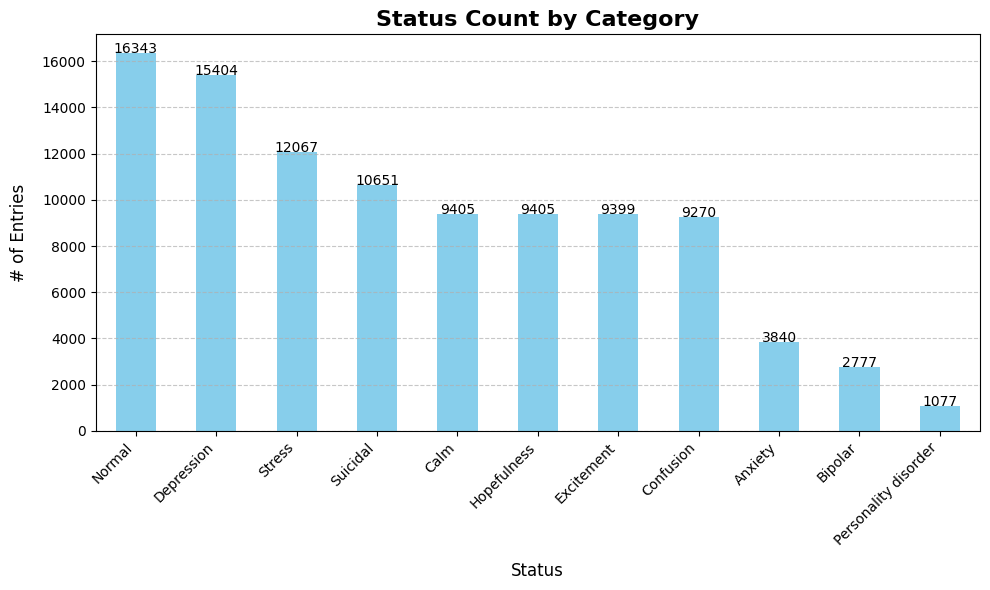

In [8]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
status_chart = status_count.plot(
    kind='bar',
    color='skyblue',  # Use a more visually appealing color
    title='Status Count'
)

# Customize the chart
status_chart.set_title('Status Count by Category', fontsize=16, fontweight='bold')  # Update title styling
status_chart.set_xlabel('Status', fontsize=12, labelpad=10)  # Customize X-axis label
status_chart.set_ylabel('# of Entries', fontsize=12, labelpad=10)  # Customize Y-axis label
status_chart.set_xticklabels(status_count.index, rotation=45, ha='right', fontsize=10)  # Rotate and align X-axis labels

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to the bars
for index, value in enumerate(status_count):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Display the chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


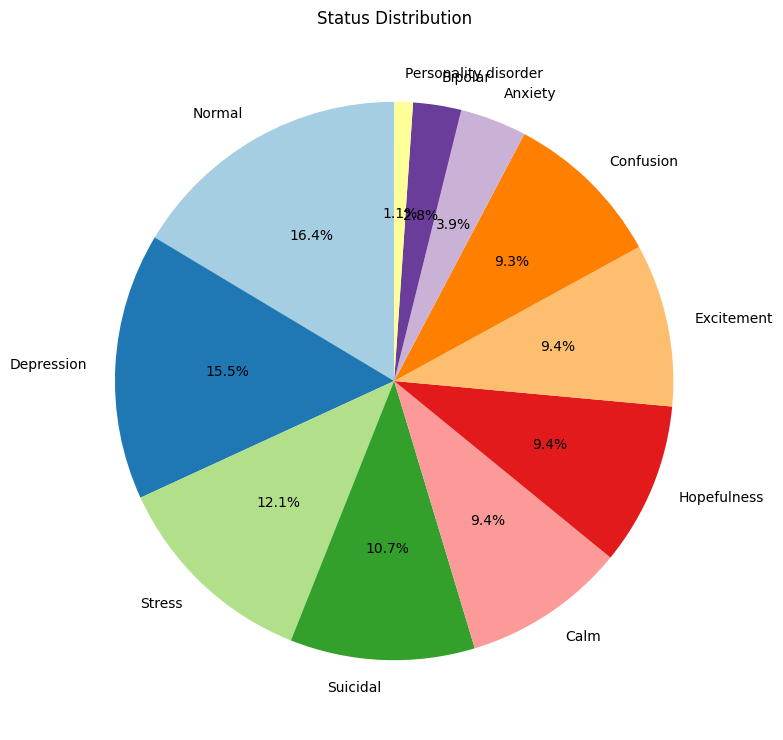

In [9]:
# Create a pie chart
plt.figure(figsize=(8, 8))
status_count.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    title="Status Distribution"
)
plt.ylabel("")  # Remove the default y-label
plt.tight_layout()
plt.show()


- Checks if the column `statement` exists in the DataFrame.
- Converts the `statement` column to a Python list, dropping any `NaN` values.
- Provides feedback on the number of entries successfully converted to the list.
- Writes all sentences to a text file (`statements_output.txt`) with numbered lines for clarity.
- Uses a `try-except` block to handle potential errors:
  - Raises a `KeyError` if the `statement` column is missing.
  - Catches and displays other exceptions.
- Avoids exceeding Jupyter's output limit by saving sentences to a file instead of printing them.


In [10]:
# Safely convert the 'statement' column to a list and save all sentences to a file
try:
    if 'statement' in df.columns:
        # Convert the column to a list
        statements = df['statement'].dropna().to_list()  # Drop NaN values
        print(f"Successfully converted 'statement' column to a list with {len(statements)} entries.\n")
        
        # Save all sentences to a text file
        output_file = "statements_output.txt"
        with open(output_file, "w", encoding="utf-8") as file:
            for idx, sentence in enumerate(statements, start=1):
                file.write(f"{idx}. {sentence}\n")
        print(f"All statements have been saved to {output_file}.")
    else:
        raise KeyError("The column 'statement' does not exist in the DataFrame.")
except Exception as e:
    print(f"An error occurred: {e}")


Successfully converted 'statement' column to a list with 99638 entries.

All statements have been saved to statements_output.txt.


- **Import Sentiment Analyzer**:
  - Imports `SentimentIntensityAnalyzer` from `vaderSentiment` for sentiment analysis.

- **Initialize Analyzer**:
  - Creates an instance of `SentimentIntensityAnalyzer`.

- **Define Sentiment Analysis Function**:
  - Function `analyze_statement(statement)`:
    - Calculates sentiment scores using `analyzer.polarity_scores()`.
    - Extracts the `compound` score.
    - Classifies sentiment:
      - "Positive" if `compound` ≥ 0.05.
      - "Negative" if `compound` ≤ -0.05.
      - "Neutral" otherwise.
    - Returns sentiment label and compound score.

- **Analyze All Statements**:
  - Iterates through the list `statements` to analyze each statement.
  - Stores the results as a list of tuples (`sentiment, compound_score`).

- **Extract Sentiment and Scores**:
  - Uses `zip(*results)` to separate sentiments and scores into two lists:
    - `sentiment`: List of sentiment labels ("Positive", "Negative", "Neutral").
    - `score`: List of compound sentiment scores.


In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment of a single statement
def analyze_statement(statement):
    statement_sentiment = analyzer.polarity_scores(statement)
    compound_score = statement_sentiment['compound']
    
    # Determine sentiment
    if compound_score >= 0.05:
        return "Positive", compound_score
    elif compound_score <= -0.05:
        return "Negative", compound_score
    else:
        return "Neutral", compound_score

# Analyze sentiments for all statements
results = [analyze_statement(statement) for statement in statements]

# Extract sentiment and score into separate lists
sentiment, score = zip(*results)  # Unpack the tuple list into two separate lists



In [12]:
# Creating sentiment and score columns.
df['sentiment'] = sentiment
df['score'] = score
df.head()

,statement,status,sentiment,score
0,oh my gosh,Anxiety,Neutral,0.0000
1,"trouble sleeping, confused mind, restless hear...",Anxiety,Negative,-0.2263
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,Negative,-0.7351
3,I've shifted my focus to something else but I'...,Anxiety,Negative,-0.4215
4,"I'm restless and restless, it's been a month n...",Anxiety,Negative,-0.4939


In [13]:
# Displaying a sample of the new DataFrame.
df.sample(10)

,statement,status,sentiment,score
47536,Morning lows what too do? Im currently in ther...,Depression,Positive,0.7506
60762,It must be hard to figure things out when noth...,Confusion,Negative,-0.3818
28545,I have complex ptsd due to past romantic relat...,Stress,Negative,-0.8979
86688,"Youre probably asking yourself, 'How does thi...",Confusion,Positive,0.1280
86325,You seem to be holding on to a quiet belief th...,Hopefulness,Positive,0.6597
58627,"Youre probably asking yourself, 'How does thi...",Confusion,Positive,0.1280
23349,I have a life that some envy yet I am suicidal...,Depression,Negative,-0.6539
91908,"You're caught in a whirlwind of thoughts, aren...",Confusion,Positive,0.3612
36449,@Pete_Brown That's In-and-Out,Normal,Neutral,0.0000
34877,Trouble getting deep breath? Iâve had troubl...,Anxiety,Positive,0.9437


In [14]:
# Get the number of different results in the sentiment column:
sentiment_count = df['sentiment'].value_counts()
sentiment_count

sentiment
Positive    58009
Negative    35114
Neutral      6515
Name: count, dtype: int64

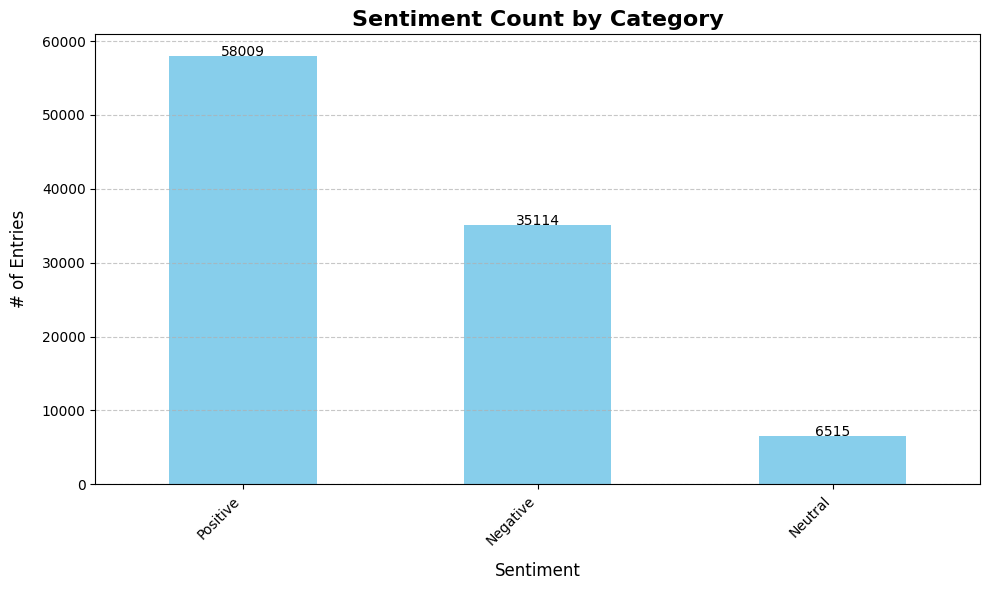

In [15]:
import matplotlib.pyplot as plt

# Create the bar chart with improved aesthetics
plt.figure(figsize=(10, 6))  # Set figure size for better readability
sentiment_chart = sentiment_count.plot(
    kind='bar',
    color='skyblue',  # Use a visually appealing color
    title='Sentiment Count'
)

# Customize the chart
sentiment_chart.set_title('Sentiment Count by Category', fontsize=16, fontweight='bold')  # Update title styling
sentiment_chart.set_xlabel('Sentiment', fontsize=12, labelpad=10)  # Customize X-axis label
sentiment_chart.set_ylabel('# of Entries', fontsize=12, labelpad=10)  # Customize Y-axis label
sentiment_chart.set_xticklabels(sentiment_count.index, rotation=45, ha='right', fontsize=10)  # Rotate and align X-axis labels

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to each bar
for index, value in enumerate(sentiment_count):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Display the chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [16]:
# Set the features variable.
X = df['statement']
# Set the target variables.
y_status = df['status']
y_sentiment = df['sentiment']

In [17]:
# Split data into training and testing for status
X_status_train, X_status_test, y_status_train, y_stauts_test = train_test_split(X, y_status, test_size=0.25, random_state=1)

In [18]:
# Split data into training and testing for sentiment
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(X, y_sentiment, test_size=0.30, random_state=1)

## ML Model

Title: y_status_train

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def train_and_evaluate_model(X_train, y_train, X_test, y_test, task_name="Model", dual_param='auto'):
    """
    Trains and evaluates a Tfidf + LinearSVC model using the given training and testing data.

    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_test: Testing features
    - y_test: Testing labels
    - task_name (str): A descriptive name for the task (e.g., "Status Classification" or "Sentiment Analysis")
    - dual_param (str/bool): Value for the 'dual' parameter of the LinearSVC model (default is 'auto')

    Returns:
    - results (dict): A dictionary containing the model, predictions, confusion matrix, accuracy, and classification report
    """
    
    # Step 1: Create a Pipeline with TfidfVectorizer and LinearSVC
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=None)),
        ('classifier', LinearSVC(dual=dual_param))
    ])
    
    # Step 2: Train the model
    pipeline.fit(X_train, y_train)
    print(f"{task_name} model training complete.\n")
    
    # Step 3: Generate predictions
    predictions = pipeline.predict(X_test)
    print(f"{task_name} Predictions:\n", predictions)
    
    # Step 4: Create a DataFrame to visualize predictions vs. actuals
    test_results = pd.DataFrame({'X_test': X_test, 'Predicted_y': predictions, 'Actual_y': y_test})
    print(f"\n{task_name} Test Results:\n", test_results)
    
    # Step 5: Calculate accuracy on training and testing data
    training_accuracy = pipeline.score(X_train, y_train)
    testing_accuracy = pipeline.score(X_test, y_test)
    print(f"\n{task_name} Training Accuracy: {training_accuracy:.4f}")
    print(f"{task_name} Testing Accuracy: {testing_accuracy:.4f}")
    
    # Step 6: Generate confusion matrix and classification report
    confusion_mat = confusion_matrix(y_test, predictions)
    print(f"\n{task_name} Confusion Matrix:\n", confusion_mat)
    
    classification_rep = classification_report(y_test, predictions)
    print(f"\n{task_name} Classification Report:\n", classification_rep)
    
    # Step 7: Calculate overall accuracy
    overall_accuracy = accuracy_score(y_test, predictions)
    print(f"\n{task_name} Overall Accuracy: {overall_accuracy:.4f}")
    
    # Return all results as a dictionary for further analysis
    results = {
        'pipeline': pipeline,
        'predictions': predictions,
        'test_results_df': test_results,
        'training_accuracy': training_accuracy,
        'testing_accuracy': testing_accuracy,
        'confusion_matrix': confusion_mat,
        'classification_report': classification_rep,
        'overall_accuracy': overall_accuracy
    }
    
    
    
    return results


def train_and_evaluate_model1(X_train, y_train, X_test, y_test, pipeline_name='default', dual_param='auto', stop_words=None):
    """
    Train and evaluate a classification model using a TF-IDF Vectorizer and LinearSVC.
    
    Parameters:
    - X_train: Training features (list or DataFrame)
    - y_train: Training labels (list or Series)
    - X_test: Test features (list or DataFrame)
    - y_test: Test labels (list or Series)
    - stop_words: Stop words to use in the TfidfVectorizer ('english', None, or custom list of stop words)
    - dual_param: Parameter for the LinearSVC dual option
    - pipeline_name: A label to distinguish between different pipelines for tracking/logging purposes
    
    Returns:
    - model: The trained pipeline model
    - predictions: Predictions on the test set
    - metrics: A dictionary containing training accuracy, testing accuracy, and overall accuracy
    """
    print(f"\n--- Starting Training and Evaluation for {pipeline_name} ---\n")
    # Step 1: Create the pipeline with stop words parameter
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=stop_words)),
        ('classifier', LinearSVC(dual=dual_param))
    ])
    
    # Step 2: Train the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Step 3: Make predictions on the test data
    predictions = pipeline.predict(X_test)
    print(f"{pipeline_name} - Predictions:\n", predictions)
    
    # Step 4: Show the test data, predicted labels, and actual labels
    test_results = pd.DataFrame({'X_test': X_test, 'Predicted_y': predictions, 'Actual_y': y_test})
    print(f"{pipeline_name} - Test Results:\n", test_results)
    
    # Step 5: Calculate training and testing accuracy
    training_accuracy = pipeline.score(X_train, y_train)
    testing_accuracy = pipeline.score(X_test, y_test)
    print(f"{pipeline_name} - Training Accuracy:", training_accuracy)
    print(f"{pipeline_name} - Testing Accuracy:", testing_accuracy)
    
    # Step 6: Create and print the confusion matrix
    confusion_mat = confusion_matrix(y_test, predictions)
    print(f"{pipeline_name} - Confusion Matrix:\n", confusion_mat)
    
    # Step 7: Print the classification report
    class_report = classification_report(y_test, predictions)
    print(f"{pipeline_name} - Classification Report:\n", class_report)
    
    # Step 8: Calculate and print the overall accuracy
    overall_accuracy = accuracy_score(y_test, predictions)
    print(f"{pipeline_name} - Overall Accuracy:", overall_accuracy)
    
    # Step 9: Store evaluation metrics in a dictionary
    metrics = {
        'training_accuracy': training_accuracy,
        'testing_accuracy': testing_accuracy,
        'overall_accuracy': overall_accuracy,
        'confusion_matrix': confusion_mat,
        'classification_report': class_report
    }
    return pipeline, predictions, metrics

In [20]:
# 1
# Status classification data
status_results = train_and_evaluate_model1(
    X_train=X_status_train, 
    y_train=y_status_train, 
    X_test=X_status_test, 
    y_test=y_stauts_test, 
    pipeline_name="Status Classification", 
    dual_param=True  # Default for SVC
)


--- Starting Training and Evaluation for Status Classification ---

Status Classification - Predictions:
 ['Depression' 'Normal' 'Suicidal' ... 'Excitement' 'Normal' 'Excitement']
Status Classification - Test Results:
                                                   X_test  Predicted_y  \
39818  i cant bear not being beatiful im a man not gi...   Depression   
27819  The gist of the comments received was the K is...       Normal   
22262  I can keep my hygiene up and cook and clean th...     Suicidal   
5965                    wow. what is this thing going on       Normal   
62331  You look so serene, as if the world has paused...         Calm   
...                                                  ...          ...   
13017  So my wifes leaving me I will not give details...   Depression   
91164  I can tell you're thinking about the possibili...  Hopefulness   
58422  You can feel the pulse of excitement, cant yo...   Excitement   
43593  i think my email domain is being blocked by

Title: y_sentiment_train

In [21]:
# 2
# Sentiment analysis data
sentiment_results = train_and_evaluate_model1(
    X_train=X_sentiment_train, 
    y_train=y_sentiment_train, 
    X_test=X_sentiment_test, 
    y_test=y_sentiment_test, 
    pipeline_name="Sentiment Analysis", 
    dual_param='auto'  # Custom dual parameter
)


--- Starting Training and Evaluation for Sentiment Analysis ---



c:\Users\shubdosh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Sentiment Analysis - Predictions:
 ['Positive' 'Positive' 'Positive' ... 'Negative' 'Negative' 'Positive']
Sentiment Analysis - Test Results:
                                                   X_test Predicted_y  Actual_y
39818  i cant bear not being beatiful im a man not gi...    Positive  Positive
27819  The gist of the comments received was the K is...    Positive  Positive
22262  I can keep my hygiene up and cook and clean th...    Positive  Positive
5965                    wow. what is this thing going on    Positive  Positive
62331  You look so serene, as if the world has paused...    Positive  Positive
...                                                  ...         ...       ...
32828             they could even crack their head open.    Positive   Neutral
29109  And I woke up. It took 3 nurses and some sort ...    Positive  Positive
13752  My mom told me to take the trash out but I am ...    Negative  Negative
35469  I can see and feel my (groin) inguinal lymph n...    Negativ

Stopwords

In [22]:
# 3
# Call the function with your training and testing data
status_results_stopwords = train_and_evaluate_model1(
    X_train=X_status_train, 
    y_train=y_status_train, 
    X_test=X_status_test, 
    y_test=y_stauts_test,
    pipeline_name="Status Classification with Stop Words",
    dual_param='auto',
    stop_words='english'
)



--- Starting Training and Evaluation for Status Classification with Stop Words ---



c:\Users\shubdosh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Status Classification with Stop Words - Predictions:
 ['Depression' 'Normal' 'Normal' ... 'Excitement' 'Normal' 'Excitement']
Status Classification with Stop Words - Test Results:
                                                   X_test  Predicted_y  \
39818  i cant bear not being beatiful im a man not gi...   Depression   
27819  The gist of the comments received was the K is...       Normal   
22262  I can keep my hygiene up and cook and clean th...       Normal   
5965                    wow. what is this thing going on       Normal   
62331  You look so serene, as if the world has paused...         Calm   
...                                                  ...          ...   
13017  So my wifes leaving me I will not give details...   Depression   
91164  I can tell you're thinking about the possibili...  Hopefulness   
58422  You can feel the pulse of excitement, cant yo...   Excitement   
43593  i think my email domain is being blocked by ak...       Normal   
60335  You can f

In [23]:
#  4 sentiment analysis with stop words
sentiment_results_stopwords = train_and_evaluate_model1(
    X_train=X_sentiment_train, 
    y_train=y_sentiment_train, 
    X_test=X_sentiment_test, 
    y_test=y_sentiment_test, 
    pipeline_name="Sentiment Analysis Stop_Words", 
    dual_param='auto',
    stop_words='english'
)


--- Starting Training and Evaluation for Sentiment Analysis Stop_Words ---



c:\Users\shubdosh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Sentiment Analysis Stop_Words - Predictions:
 ['Positive' 'Positive' 'Positive' ... 'Negative' 'Negative' 'Positive']
Sentiment Analysis Stop_Words - Test Results:
                                                   X_test Predicted_y  Actual_y
39818  i cant bear not being beatiful im a man not gi...    Positive  Positive
27819  The gist of the comments received was the K is...    Positive  Positive
22262  I can keep my hygiene up and cook and clean th...    Positive  Positive
5965                    wow. what is this thing going on    Positive  Positive
62331  You look so serene, as if the world has paused...    Positive  Positive
...                                                  ...         ...       ...
32828             they could even crack their head open.    Positive   Neutral
29109  And I woke up. It took 3 nurses and some sort ...     Neutral  Positive
13752  My mom told me to take the trash out but I am ...    Negative  Negative
35469  I can see and feel my (groin) inguinal

Google Gemini model usage for enhanced responses

In [24]:
from dotenv import load_dotenv
import os
import google.generativeai as genai

# Load environment variables from .env file
load_dotenv()

# Store the API key in a variable
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

# Initialize the model with the API key
genai.configure(api_key=GEMINI_API_KEY)

# Configure the model with generation parameters
model = genai.GenerativeModel("gemini-1.5-flash",
    generation_config={
        "max_output_tokens": 150,
        "temperature": 0.3
    }
)


In [25]:
# Function to predict mental health status and sentiment
def predict_status_and_sentiment(statement, status_pipeline, sentiment_pipeline):
    status = status_pipeline[0].predict([statement])
    sentiment = sentiment_pipeline[0].predict([statement])
    return status, sentiment

In [26]:
def mental_health_chatbot(statement, chat_history, status_pipeline=status_results, sentiment_pipeline=sentiment_results):
    # Predict status and sentiment
    status, sentiment = predict_status_and_sentiment(statement, status_pipeline, sentiment_pipeline)

    # Generate response prefix
    response_prefix = f'The mental health status of the user is/has:{status}\n The sentiment of the statement is:{sentiment}\n'

    # Prompt template for generating response
    prompt_template = f"""
    You are a clinical psychologist specializing in mental health conversations.
    Answer user questions and concerns empathetically and factually.
    - If the user asks irrelevant questions, remind them you're here for mental health support.
    - Reference past inputs to provide continuity in conversation.
    - If unsure about a question, acknowledge it and recommend professional help.

    Conversation so far:
    {chat_history}
    status Prediction:
    {status}
    sentiment Prediction:
    {sentiment}

    User's Question: {statement}

    Your Response:
    """.format(chat_history="\n".join(chat_history), statement=statement)

    model_response = model.generate_content(prompt_template)

    # Mock response generation (replace with actual logic or model)
    response = response_prefix + '\n' + model_response.text

    # Update chat history
    chat_history.append(f"User: {statement}")
    chat_history.append(f"Bot: {response}")

    return response, chat_history


In [28]:
def chatbot_interface():
    print("Welcome to the Mental Health Chatbot!")
    print("Type 'exit' to end the conversation.\n")

    chat_history = []  # Persistent conversation history

    while True:
        # Get user input
        statement = input("You: ")

        # Exit condition
        if statement.lower() == "exit":
            print("Bot: Thank you for chatting. Take care!")
            break

        # Get chatbot response
        response, chat_history = mental_health_chatbot(statement, chat_history)

        # Display chatbot response
        print(response)

# Run the chatbot
chatbot_interface()

Welcome to the Mental Health Chatbot!
Type 'exit' to end the conversation.

The mental health status of the user is/has:['Anxiety']
 The sentiment of the statement is:['Negative']

I hear you saying you feel restless. That sounds really uncomfortable.  Restlessness can be a symptom of many things, including anxiety, which is something I've noted as a potential area of concern based on my initial assessment.  Can you tell me a little more about what's making you feel restless?  For example, is it a physical restlessness, like you can't sit still, or is it more of a mental restlessness, like your mind is racing?  Knowing more about the nature of your restlessness will help me understand what might be going on.

The mental health status of the user is/has:['Normal']
 The sentiment of the statement is:['Negative']

I understand you're feeling uneasy and having trouble sleeping, possibly due to homesickness and lack of exercise.  That sounds really difficult.  You mentioned feeling restless

## Gradio App

This section of code involves a user interface where users input statements about their mental state. The code then processes these inputs and returns corresponding mental health statuses using two display textbox components. The purpose is to predict and provide insights into the user's mental state based on their statements.

The data source consolidates information from various Kaggle datasets centered on different facets of mental health. It draws from diverse platforms such as social media, Reddit, Twitter, and more. Each entry is labeled with a specific mental health status, making it an invaluable resource for in-depth analyses, insights into mental health trends, patterns, and predictive modeling.
https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health

Example Statements
* "I have been feeling very anxious and stressed lately."
* "I am experiencing severe depression and can't find motivation."
* "I feel normal and haven't had any mental health issues recently."

Chatbot Responses
* "Yes, it sounds like the user may benefit from some assistance in managing their anxiety and stress. I would suggest seeking support from a mental health professional, such as a therapist or psychologist, who can help develop coping strategies and provide support. Additionally, practicing relaxation techniques, mindfulness, and engaging in regular physical activity can also help reduce anxiety and stress levels. It's important to take care of your mental health, so don't hesitate to reach out for help."
* "Yes, it sounds like the user is experiencing severe depression and a lack of motivation. I would suggest seeking help from a mental health professional, such as a therapist or psychiatrist, to discuss treatment options such as therapy, medication, or other interventions that may help improve their symptoms. It's important to reach out for support and not try to handle these feelings alone."
* "It's great to hear that you feel normal and haven't had any recent mental health issues. However, since you mentioned having bipolar disorder, it's important to continue monitoring your mental health and seeking support when needed. I would suggest staying in touch with your mental health provider, practicing self-care, and reaching out for help if you notice any changes in your mood or behavior. It's always good to have a support system in place."

In [ ]:
# Define a function to generate responses using Gradio
# Gradio interface for better UI snippets and presentation
def mental_health_chatbot_gemini(statement):
    prompt_template = """
    You are a clinical psychologist. Answer only questions that would be relevant to mental health.
    If you don't know the answer, say you don't know.
    If the human asks questions not related to mental health, remind them that your job is to help
    them understand their mental health status, and ask them for a question on that topic. If they ask a question which
    there is not enough information to answer, tell them you don't know and don't make up an
    answer.

    Question: {query}
    Answer:
    """.format(query=statement)

    predicted_status = status_results[0].predict([statement])[0]
    predicted_sentiment = sentiment_results[0].predict([statement])[0]
    # Generate a response using the model
    response = model.generate_content(prompt_template)

    # Format the output
    formatted_response = f"{response.text}\nPredicted_Status: {predicted_status}\nPredicted_Sentiment: {predicted_sentiment}"

    return formatted_response



In [32]:
# Define Gradio interface
app = gr.Interface(
    fn=mental_health_chatbot_gemini, # Use the mental_health_chatbot function
    inputs=gr.Textbox(label="Enter your statement"), # Use gr.inputs.Textbox
    outputs=gr.Textbox(label="Mental Health Chatbot Response", show_copy_button=True) # Use gr.outputs.Textbox
)

# Step 4: Launch the Gradio app
app.launch(show_error=True)


* Running on local URL:  http://127.0.0.1:7880

To create a public link, set `share=True` in `launch()`.
